In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
drugnames=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedf = pd.read_csv(mouse_drug_data_to_load)
trialdf = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mergedf = pd.merge(mousedf,trialdf,on='Mouse ID')

# Display the data table for preview
mergedf.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
mergedf.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meandf = mergedf.groupby(by=['Drug','Timepoint']).mean()

# Convert to DataFrame

# Preview DataFrame
meantumordf = meandf['Tumor Volume (mm3)'].reset_index()
meantumordf.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
semdf = mergedf.groupby(by=['Drug','Timepoint']).sem()
# Convert to DataFrame
semtumordf = semdf['Tumor Volume (mm3)'].reset_index()
# Preview DataFrame
semtumordf.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
splitmeantumordf = pd.DataFrame()
splitsemtumordf = pd.DataFrame()
#splitmeantumordf = meantumordf['Timepoint']
for name in list(meantumordf['Drug'].unique()):
    splitmeantumordf[name]=list(meantumordf['Tumor Volume (mm3)'].loc[meantumordf['Drug']==name])
    splitsemtumordf[name]=list(semtumordf['Tumor Volume (mm3)'].loc[meantumordf['Drug']==name])
# Preview that Reformatting worked
splitmeantumordf.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


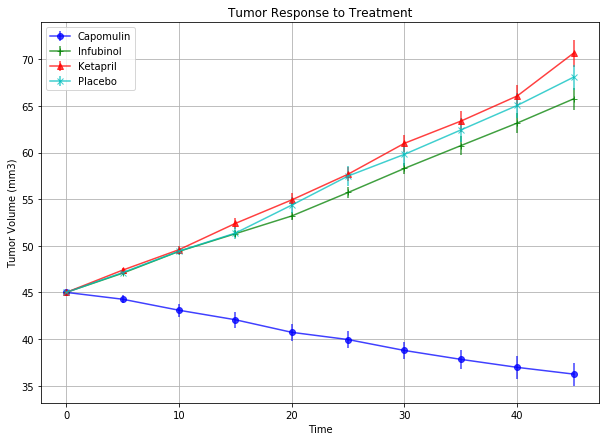

In [6]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,7))

#for fun, uncomment line below
#plt.xkcd(scale=1,length=100,randomness=2)

i=0

#This code originally ran on all ten drugs that we had data for.
#As I was unimaginative, I didn't want to think of ten different colors and markers to use
#and so just cycled through lists of different length.
colors = ['b','g','r','c','m','y','k']
markers = ['o','+','^','x','s','p','<','>','v']

for name in drugnames:
    
    plt.errorbar(np.arange(0,50,5),splitmeantumordf[name],yerr=splitsemtumordf[name],
                 label=name, color=colors[i%7], marker=markers[i%9],alpha=0.75)
    i+=1

plt.legend(loc=0)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
# Save the Figure
plt.savefig('TumorResponsetoTreatment.png',bbox_inches='tight')


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame
meanmetastaticdf = meandf['Metastatic Sites'].reset_index()
# Preview DataFrame
meanmetastaticdf.head()

#I find the current format convenient to work with

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
semmetastaticdf = semdf['Metastatic Sites'].reset_index()
semmetastaticdf.head()
# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
splitmeanmetastaticdf = pd.DataFrame()
splitsemmetastaticdf = pd.DataFrame()
#splitmeantumordf = meantumordf['Timepoint']
for name in list(meanmetastaticdf['Drug'].unique()):
    splitmeanmetastaticdf[name]=list(meanmetastaticdf['Metastatic Sites'].loc[meanmetastaticdf['Drug']==name])
    splitsemmetastaticdf[name]=list(semmetastaticdf['Metastatic Sites'].loc[meanmetastaticdf['Drug']==name])
# Preview that Reformatting worked
splitmeanmetastaticdf.head()


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


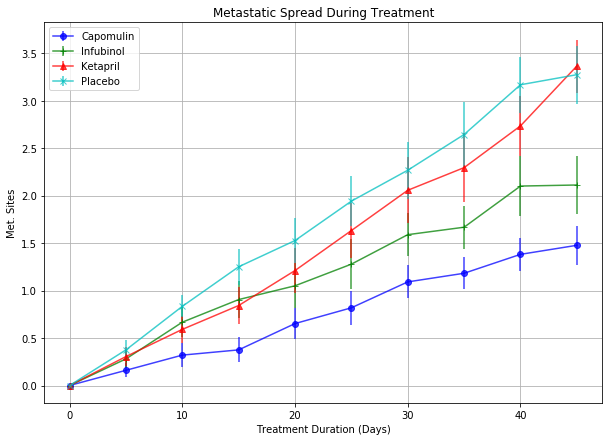

In [10]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,7))

i=0
colors = ['b','g','r','c','m','y','k']
markers = ['o','+','^','x','s','p','<','>','v']
for name in drugnames:
    
    plt.errorbar(np.arange(0,50,5),splitmeanmetastaticdf[name],yerr=splitsemmetastaticdf[name],
                 label=name, color=colors[i%7], marker=markers[i%9],alpha=0.75)
    i+=1

plt.legend(loc=0)
plt.grid()
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
# Save the Figure
plt.savefig('MetastaticSpread.png',bbox_inches='tight')


## Survival Rates

In [11]:
countdf = pd.DataFrame()
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
countdf = mergedf.groupby(['Drug','Timepoint']).count()
# Convert to DataFrame
countdf = countdf['Mouse ID']
countdf = countdf.reset_index()
countdf = countdf.rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame
countdf.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
splitcountdf = pd.DataFrame()
for name in list(countdf['Drug'].unique()):
    splitcountdf[name]=list(countdf['Mouse Count'].loc[countdf['Drug']==name])
splitcountdf.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,25,25,25,25,25,25,26,25,26,25
1,25,21,25,23,23,24,25,25,25,24
2,25,20,21,22,21,24,23,24,23,22
3,24,19,21,19,21,20,17,24,23,21
4,23,18,20,19,20,19,17,23,21,17


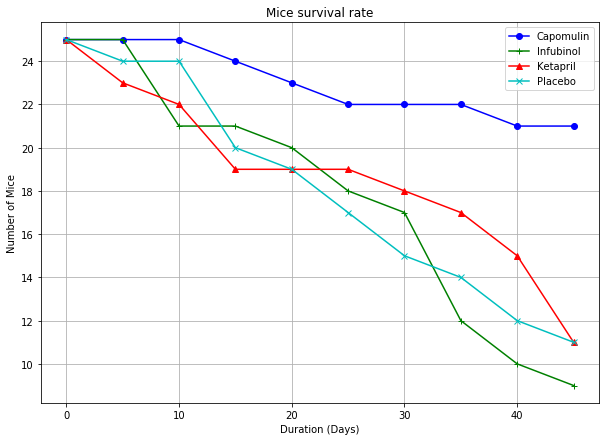

In [13]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,7))
i=0
for name in drugnames:
    plt.plot(np.arange(0,50,5),splitcountdf[name],color=colors[i%7],marker=markers[i%8])
    i+=1
plt.legend(loc=0)
plt.grid()
plt.xlabel('Duration (Days)')
plt.ylabel('Number of Mice')
plt.title('Mice survival rate')
# Save the Figure
plt.savefig('MiceSurvival',bbox_inches='tight')
# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
pcntchanges = []
for name in drugnames:
    pcntchanges.append((splitmeantumordf[name][9]/splitmeantumordf[name][0])-1)
# Display the data to confirm
pcntchanges

[-0.19475302667894168,
 0.4612347172785187,
 0.5702879468660607,
 0.5129796048315152]

In [15]:
colors=[]
for pcnt in pcntchanges:
    if pcnt>= 0:
        colors.append('red')
    else:
        colors.append('green')
colors

['green', 'red', 'red', 'red']

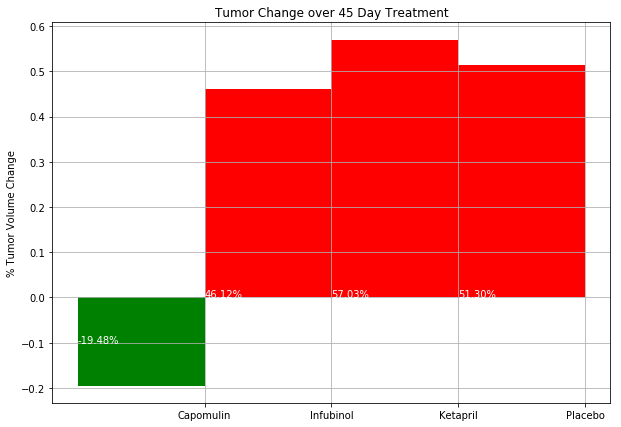

In [16]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(drugnames))-1,pcntchanges, color=colors,align='edge',width=1)
plt.xticks(np.arange(len(drugnames)),drugnames)
plt.ylabel('% Tumor Volume Change')
plt.grid()
plt.title('Tumor Change over 45 Day Treatment')
for i in np.arange(len(drugnames)):
    if pcntchanges[i]>= 0:
        plt.text(x=i-1,y=0,s="{0:.2%}".format(pcntchanges[i]),color='white')
    else:
        plt.text(x=i-1,y=-0.1,s="{0:.2%}".format(pcntchanges[i]),color='white')
    
# Save the Figure
plt.savefig('TumorPercentChange.png',bbox_inches='tight')

# Show the Figure